In [ ]:
  %pip install ucimlrepo

Epoch [1000/50000], Loss: 158.62164307
Epoch [2000/50000], Loss: 156.41734314
Epoch [3000/50000], Loss: 154.63882446
Epoch [4000/50000], Loss: 153.08166504
Epoch [5000/50000], Loss: 151.70104980
Epoch [6000/50000], Loss: 150.41421509
Epoch [7000/50000], Loss: 149.00402832
Epoch [8000/50000], Loss: 147.22990417
Epoch [9000/50000], Loss: 145.03570557
Epoch [10000/50000], Loss: 142.36857605
Epoch [11000/50000], Loss: 139.19383240
Epoch [12000/50000], Loss: 135.72557068
Epoch [13000/50000], Loss: 132.23094177
Epoch [14000/50000], Loss: 128.86734009
Epoch [15000/50000], Loss: 125.70524597
Epoch [16000/50000], Loss: 122.74861145
Epoch [17000/50000], Loss: 119.93598175
Epoch [18000/50000], Loss: 117.18844604
Epoch [19000/50000], Loss: 114.45823669
Epoch [20000/50000], Loss: 111.73818970
Epoch [21000/50000], Loss: 109.04159546
Epoch [22000/50000], Loss: 106.38404846
Epoch [23000/50000], Loss: 103.78211975
Epoch [24000/50000], Loss: 101.24865723
Epoch [25000/50000], Loss: 98.78685760
Epoch [260

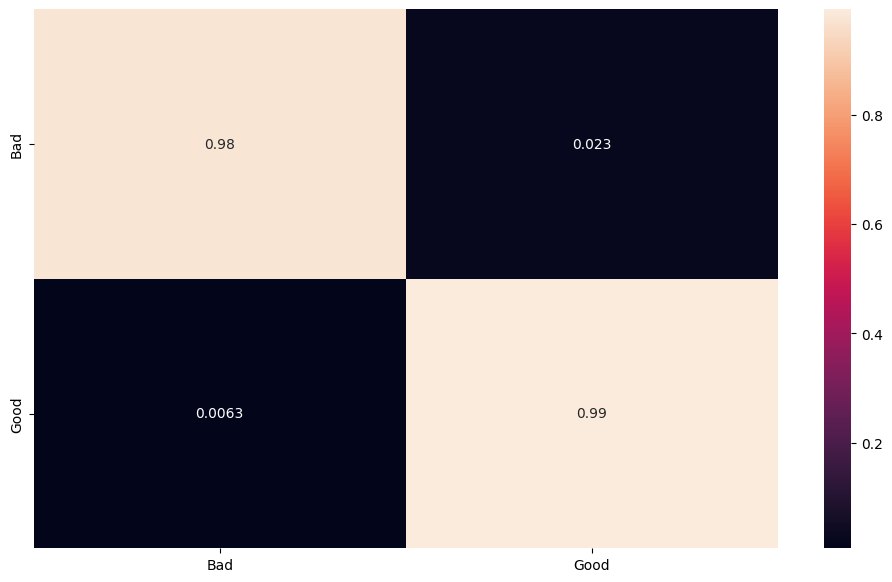

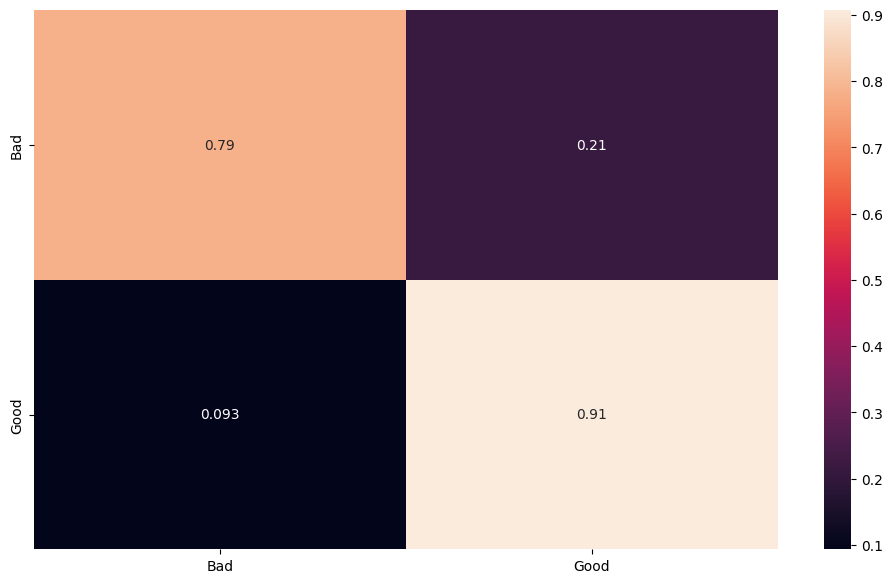

In [ ]:
from ucimlrepo import fetch_ucirepo
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn
import random

# fetch dataset
ionosphere = fetch_ucirepo(id=52)
train = ionosphere.data.features.sample(frac=0.7,random_state=random.seed(100))
test = ionosphere.data.features.drop(train.index)

# data (as pandas dataframes)
target_col = "Class"
train_X = torch.tensor((train.to_numpy())).float()
test_X = torch.tensor((test.to_numpy())).float()

train_y = ionosphere.data.targets.drop(test.index)
test_y = ionosphere.data.targets.drop(train.index)
train_y = torch.tensor(np.array([1 if val[0]=="g" else 0 for val in train_y.values]), dtype=torch.long)
test_y = torch.tensor(np.array([1 if val[0]=="g" else 0 for val in test_y.values]), dtype=torch.long)

# Parameters
input_size = len(train_X[0]) # input dimensionality
hidden_size = int(input_size*10)
output_size = 2
num_epochs = 50000 # how many iterations to run / train?
learning_rate = 2*10**(-5) # talk about in class!

# Linear regression model
model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Sigmoid(),
            nn.Linear(hidden_size, output_size)
        )

# Loss and optimizer
criterion = nn.CrossEntropyLoss(label_smoothing=0.1, reduction ="sum")
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # says use stochastic gradient descent

# Train the model
for epoch in range(num_epochs): # train for num_epochs
    # Forward pass
    outputs = model(train_X) # what outputs given our current weights?
    loss = criterion(outputs, train_y) # evaluate the loss

    # Backward error and optimize!
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

        # just some simple reporting
    if (epoch+1) % 1000 == 0:
        print ('Epoch [{}/{}], Loss: {:.8f}'.format(epoch+1, num_epochs, loss.item()))

predicted_arr = []
true_arr = []

with torch.no_grad():
  for (input, output) in zip(train_X,train_y):
    predicted_y = model(input)
    predicted_y = (torch.max(torch.exp(predicted_y), 0)[1]).data.cpu().numpy()
    predicted_arr.append(predicted_y)

    output = output.data.cpu().numpy()
    true_arr.append(output) # Save Truth

# Build confusion matrix
cf_matrix = confusion_matrix(true_arr, predicted_arr)
classes = ('Bad', 'Good')
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

with torch.no_grad():
  for (input, output) in zip(test_X,test_y):
    predicted_y = model(input)
    predicted_y = (torch.max(torch.exp(predicted_y), 0)[1]).data.cpu().numpy()
    predicted_arr.append(predicted_y)

    output = output.data.cpu().numpy()
    true_arr.append(output) # Save Truth

# Build confusion matrix
cf_matrix = confusion_matrix(true_arr, predicted_arr)
classes = ('Bad', 'Good')
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')